In [2]:
import sys
sys.path.append('./latent-diffusion/ldm/data/')

In [3]:
import torch
import numpy as np
from ct_rsna import CTDataset
from matplotlib import pyplot as plt

In [4]:
np.random.seed(7)

In [5]:
train_dir = './data/ct-rsna/train'
val_dir = './data/ct-rsna/validation'

In [6]:
ct_ds_train = CTDataset(data_dir=train_dir, labels_file='train_set.csv', size=256, flip_prob=0.5)
ct_ds_val = CTDataset(data_dir=val_dir, labels_file='validation_set.csv', size=256, flip_prob=0.5)

In [13]:
blanks = [176, 281, 284, 368, 376]

for b in blanks:
    print(ct_ds_train.ids.iloc[b])
    im = ct_ds_train[b]['image']
    if torch.isnan(im).any():
        print(f'    Still got nan at {b}')


ID_516922b83
ID_9e82ecd22
ID_15af5ef11
ID_3e99d530b
ID_776680abf


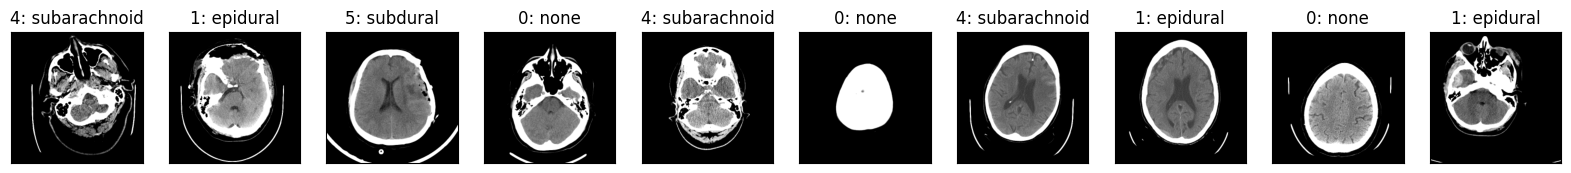

In [7]:
N = 10
plt.figure(figsize=(20, 5))
for i, idx in enumerate(np.random.choice(len(ct_ds_train), N)):

    data = ct_ds_train[idx]
    x, y, label = data['image'], data['class_label'], data['human_label']

    title = f'{int(y)}: {label}'

    plt.subplot(1, N, i+1)
    plt.imshow(x[..., 0].squeeze(), cmap='gray', vmin=-1., vmax=1.)
    plt.title(title)
    plt.xticks([])
    plt.yticks([])

plt.show()

In [8]:
# k = 512

# for i in range(k):
#     data = ct_ds_train[i]
    
#     if torch.isnan(data['image']).any():
#         print(f'Blacklist file train_set #{i}: ')

#     data = ct_ds_val[i]
    
#     if torch.isnan(data['image']).any():
#         print(f'Blacklist file validation_set #{i}: ')

Blacklist file train_set #176: 
Blacklist file train_set #281: 
Blacklist file train_set #284: 
Blacklist file train_set #368: 
Blacklist file train_set #376: 
